Average Word Count by Sentiment:
sentiment
negative    16.125000
neutral     18.285714
positive    16.000000
Name: word_count, dtype: float64


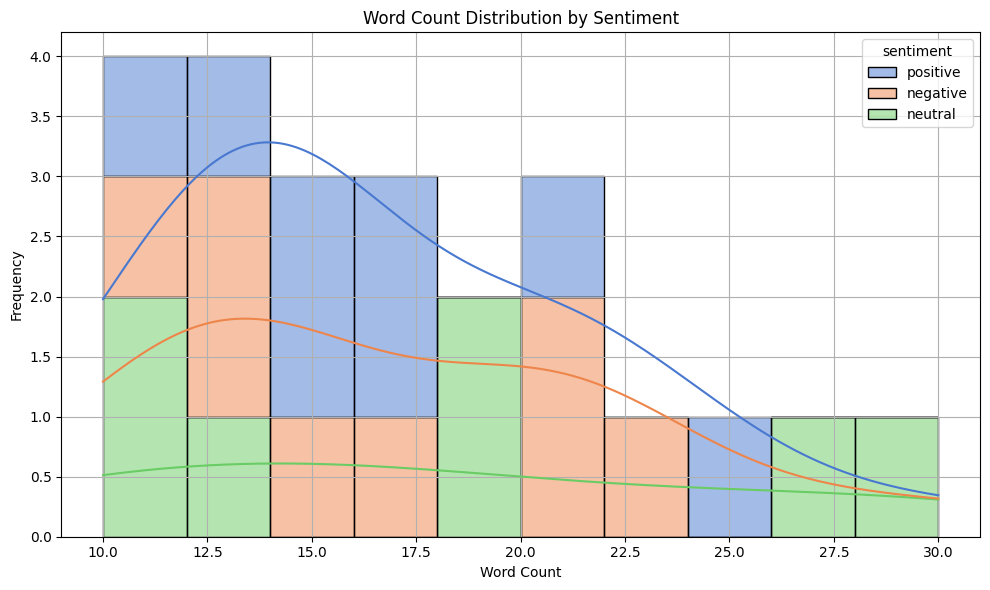


Sample Positive Review Near Positive Cluster:
Review:
"This product is amazing! It works exactly as advertised and has made my life so much easier. I would highly recommend it to anyone."
Word Count: 24


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

def load_review_data(filepath: str) -> pd.DataFrame:
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.lower()
    return df[['review', 'sentiment']]

def preprocess_reviews(df: pd.DataFrame) -> pd.DataFrame:
    df['clean_review'] = df['review'].apply(lambda text: re.sub(rf"[{string.punctuation}]", "", text.lower()))
    df['word_count'] = df['clean_review'].apply(lambda text: len(text.split()))
    return df

def average_word_count_by_sentiment(df: pd.DataFrame) -> pd.Series:
    return df.groupby('sentiment')['word_count'].mean()

def plot_word_count_distribution(df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='word_count', hue='sentiment', bins=10, kde=True, palette='muted', multiple='stack')
    plt.title("Word Count Distribution by Sentiment")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def show_sample_positive(df: pd.DataFrame):
    sample = df[df['sentiment'] == 'positive'].sort_values(by='word_count', ascending=False).iloc[0]
    print("\nSample Positive Review Near Positive Cluster:")
    print(f"Review:\n{sample['review']}")
    print(f"Word Count: {sample['word_count']}")

if __name__ == "__main__":
    df = load_review_data("reviews.csv")  # Replace with correct file path if needed
    df = preprocess_reviews(df)

    print("Average Word Count by Sentiment:")
    print(average_word_count_by_sentiment(df))

    plot_word_count_distribution(df)
    show_sample_positive(df)
